<a href="https://colab.research.google.com/github/GabriellFelipe07/ExploratoryDataAnalysis_StudentsPerformance/blob/main/Students_Performace_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Students Performance in Exams**
Gabriel Felipe Machado de Oliveira, 2022

# **1. Informações do dataset**
## 1.1. Extração
O dataset utilizado no presente estudo foi extraído da plataforma Kaggle (https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

## 1.2. Definições e variáveis
A base de dados traz informações do desempenho de estudantes em uma avaliação a fim de se analisar seus desempenhos e três principais competências: cálculo matemático; leitura; e escrita. Como ferramenta de mensuração foi utilizado um score do teste para cada uma das competências consideradas. O dataset basicamente busca a resposta para questões do tipo:
- Quão eficaz é o curso de preparação para o teste?
- Quais os principais fatores que contribuem para os resultados dos testes?
- Qual seria a melhor maneira de melhorar as notas dos alunos em cada teste?
- Que padrões e interações nos dados você pode encontrar


## 1.3. Variáveis
As colunas da base e suas respectivas explicações seguem abaixo:
- gender: gênero do participante;
- race/ethnicity: grupos de raças/etinias;
- parental level of education: nível de escolaridade dos pais;
- lunch: informações da alimentação do candidato;
- test preparation course: se o participante concluiu ou não o curso preparatório do exame;
- math score: pontuação de matemática do estudante;
- reading score: pontuação de leitura do estudante;
- writing score: pontuação de escrita na escrita

## 1.4. Tamanho do dataset
O dataset utilizado possui um total de 8 colunas e 1000 linhas.

# **2. Objetivos**
## 2.1. Introdução
O objetivo principal do estudo é, através de métodos estatísticos, analisar correlações entre variáveis explicativas e as variáveis respotas (scores). O modelos estatísticos utilizados serão especificados conforme o avanço do estudo e o nível de significância para todos testes seão de 5% (𝛂 = 5%). Serão utilizados testes de hipóteses a fim de responder peguntas previamente realizadas.

## 2.2. Tópicos de abordagem
Como guia para o estudo, utilizou-se de perguntas provocativas, são elas:
- Estudantes de gênero masculinos possuem scores maiores que estudantes do gênero feminino?
- Estudantes que concluíram o curso preparatório alcançaram uma média de score maior que estudantes que não finalizaram o trinamento?
- O nível de escolaridade dos pais possui influência na pontuação dos estudantes em matemática?
- Há correlação entre as três áreas de competência?



# **4. Extração e Limpeza da Base de Dados**
Etapa prática introdutória voltada para limpeza e adequação dos dados. 


In [ ]:
#Extração de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts 

In [ ]:
#Extração dos dados e visualização
data = pd.read_csv('exams.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [ ]:
#Análise dos tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Há 5 variáveis categóricas e 3 numéricas inteiras.

In [ ]:
#Bucando valores nulos
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
#Buscando valores vazios
data.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


Como visto, os dados estão prontos para serem analisados. Não há valores vazios ou nulos.

# **5. Análise das variáveis**

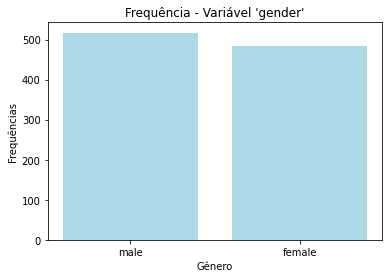

In [ ]:
plt.bar(data['gender'].unique(), data['gender'].value_counts(), color = 'lightblue')
plt.xlabel('Gênero')
plt.ylabel('Frequências')
plt.title("Frequência - Variável 'gender'")
plt.show()

Há mais homens do que mulheres na base.